# Estudo de Caso: Classificação Estelar com Redes Neurais

Este estudo tem como objetivo desenvolver e treinar uma rede neural artificial para classificar objetos astronômicos em três categorias: **galáxias, estrelas e quasares**. Utilizamos o dataset **Stellar Classification Dataset - SDSS17**, que contém atributos físico-espectrais desses corpos celestes.

O foco deste notebook é a aplicação prática dos conceitos teóricos de redes neurais, abordando temas como:
- Construção da arquitetura de redes neurais;
- Efeitos de variações na largura (número de neurônios por camada) e na profundidade (número de camadas);
- Análise de underfitting e overfitting;
- Avaliação do impacto de hiperparâmetros como **learning rate** e número de épocas;
- Aplicação de técnicas de regularização e otimização.

A implementação será realizada utilizando o framework **TensorFlow/Keras**, com suporte para análise visual dos resultados e discussão sobre a influência das escolhas de arquitetura e hiperparâmetros no desempenho do modelo.


## Carregamento das bibliotecas e do dataset

Nesta etapa, realizamos a importação das bibliotecas necessárias para manipulação dos dados, construção da rede neural, visualização dos resultados e avaliação do modelo.

O dataset utilizado é o **Stellar Classification Dataset - SDSS17**, que contém características espectrais e físicas de objetos astronômicos, classificados em três categorias: **galáxias, estrelas e quasares**.

As bibliotecas principais utilizadas são:
- **Pandas e NumPy:** para manipulação e análise dos dados;
- **Matplotlib e Seaborn:** para visualização gráfica;
- **TensorFlow/Keras:** para construção e treinamento da rede neural;
- **Scikit-Learn:** para pré-processamento dos dados e avaliação de métricas.

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Imports essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Imports para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#Imports para redes neurais
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Carregar o dataset
caminho_dataset = '/content/drive/MyDrive/star_classification.csv'
df = pd.read_csv(caminho_dataset)

print("Informações do Dataset:")
print(df.info())

print("\nPrimeiras linhas do Dataset:")
display(df.head())

print("\nVerificação de valores nulos:")
print(df.isnull().sum())

print("\nAnálise da distribuição das classes")
df['class'].value_counts()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  p

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842



Verificação de valores nulos:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Análise da distribuição das classes


,count
class,
GALAXY,59445
STAR,21594
QSO,18961


## Análise Inicial do Dataset

Nesta etapa, carregamos e examinamos as informações básicas do nosso dataset de classificação estelar.

O dataset contém **100.000 registros** com **18 colunas**, que incluem tanto atributos numéricos contínuos (como coordenadas e magnitudes em diferentes filtros) quanto variáveis categóricas (como a classe do objeto).

### Estrutura dos Dados

- As colunas variam entre float64 (valores numéricos com casas decimais), int64 (valores inteiros) e uma coluna object para a classe do objeto astronômico.
- A coluna alvo (target) é a class, que possui três categorias: **GALAXY**, **STAR** e **QSO** (quasar).

### Dados Ausentes

- Não há valores nulos em nenhuma coluna, o que facilita o pré-processamento, pois não será necessário tratamento de dados faltantes.

### Distribuição das Classes

- O dataset é relativamente desbalanceado:
  - GALAXY é a classe majoritária, com 59.445 amostras;
  - STAR possui 21.594 amostras;
  - QSO (quasar) tem 18.961 amostras.
  
Este desbalanceamento será importante para levar em conta no treinamento e avaliação do modelo, podendo influenciar a escolha de métricas e estratégias para evitar vieses.

Essa análise inicial garante que entendemos bem a estrutura e a qualidade dos dados antes de aplicar os modelos de rede neural.


## Exploração dos Dados (EDA)

Nesta etapa, realizamos a análise exploratória do dataset para entender a distribuição das variáveis, a quantidade de amostras por classe e possíveis padrões nos dados.

Os principais objetivos desta análise são:
- Verificar se há balanceamento ou desbalanceamento nas classes alvo (Galaxy, Star, QSO);
- Analisar a distribuição das variáveis numéricas para entender a necessidade de normalização ou tratamento de outliers;
- Investigar correlações entre atributos que possam impactar no desempenho da rede neural.

A análise exploratória é fundamental para orientar as decisões nas etapas de pré-processamento e construção da arquitetura do modelo.


In [ ]:
X = df.drop(['class', 'obj_ID'], axis=1)

le = LabelEncoder()
y = le.fit_transform(df['class'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435 (1.70 KB)

 Trainable params: 435 (1.70 KB)

 Non-trainable params: 0 (0.00 B)

## Construção e Resumo do Modelo de Rede Neural

Nesta etapa, definimos uma rede neural sequencial simples para a tarefa de classificação das estrelas, galáxias e quasares.

### Arquitetura do Modelo

- A rede possui **3 camadas densas (fully connected)**:
  - Primeira camada com 16 neurônios e função de ativação ReLU.
  - Segunda camada com 8 neurônios e ReLU.
  - Camada de saída com 3 neurônios (uma para cada classe) e função de ativação softmax, que produz probabilidades para classificação multiclasses.

### Configuração do Treinamento

- Utilizamos o otimizador **Adam**, conhecido por ser eficiente e amplamente utilizado em deep learning.
- A função de perda é a **sparse_categorical_crossentropy**, adequada para classificação múltipla com rótulos inteiros.
- Métrica acompanhada durante o treino é a **acurácia**.

### Resumo do Modelo

- O modelo possui **435 parâmetros treináveis**.
- Isso indica que o modelo é leve, com baixa complexidade, adequado para começar e evitar overfitting em datasets com essa quantidade de dados.

---

Com o modelo definido e compilado, estamos prontos para prosseguir ao treinamento, onde o modelo irá aprender a mapear as características de entrada para suas respectivas classes.


## Treinamento do Modelo

Treinamos o modelo definido por 50 épocas, utilizando 20% dos dados de treino para validação interna.

### Análise dos Resultados do Treinamento

- **Acurácia inicial no treino** começa em cerca de 74%, e rapidamente sobe para cerca de 97% nas últimas épocas.
- A **acurácia na validação** inicia mais alta, em cerca de 93%, e se mantém próxima de 97% ao longo do treinamento.
- A **função de perda (loss)** diminui rapidamente em ambas as fases (treino e validação), indicando que o modelo está aprendendo bem os padrões do dataset.
- A diferença entre a perda e acurácia de treino e validação é pequena, o que indica que não há forte indício de overfitting.
- A estabilidade da validação após as primeiras épocas indica que o modelo está generalizando bem.

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32
)


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7440 - loss: 0.6163 - val_accuracy: 0.9322 - val_loss: 0.2046
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9399 - loss: 0.2174 - val_accuracy: 0.9472 - val_loss: 0.1680
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9524 - loss: 0.1892 - val_accuracy: 0.9553 - val_loss: 0.1512
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9573 - loss: 0.1705 - val_accuracy: 0.9581 - val_loss: 0.1429
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9595 - loss: 0.1395 - val_accuracy: 0.9608 - val_loss: 0.1388
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9620 - loss: 0.1339 - val_accuracy: 0.9615 - val_loss: 0.1318
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9630 - loss: 0.1294 - val_accuracy: 0.9628 - val_loss: 0.1246
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9635 - loss: 0.1250

## Visualização do Histórico de Treinamento

Os gráficos abaixo mostram a evolução da função de perda (loss) e da acurácia durante as 50 épocas de treinamento do modelo.

- O gráfico de **loss** exibe a diminuição da função de custo tanto para os dados de treino quanto para os de validação.
- O gráfico de **acurácia** mostra o aumento da precisão do modelo para ambos os conjuntos.

A análise visual desses gráficos ajuda a identificar comportamentos como overfitting (quando a perda de validação aumenta enquanto a de treino diminui) ou underfitting (quando o modelo não aprende bem, apresentando baixa acurácia).

Neste caso, esperamos ver curvas próximas e estáveis, confirmando que o modelo está aprendendo adequadamente e generalizando bem para dados não vistos.


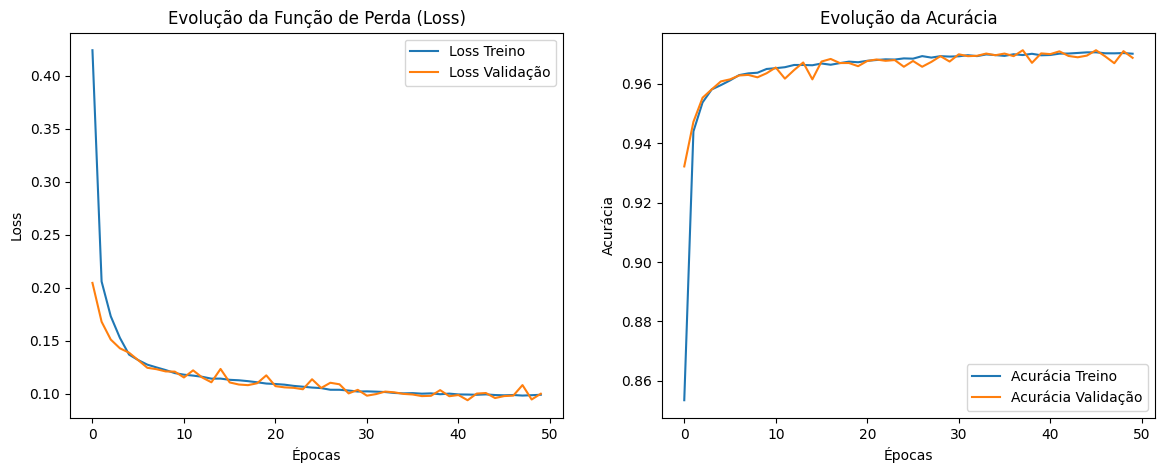

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(14,5))

    # Gráfico loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss Treino')
    plt.plot(history.history['val_loss'], label='Loss Validação')
    plt.title('Evolução da Função de Perda (Loss)')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    # Gráfico da acurácia
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Acurácia Treino')
    plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
    plt.title('Evolução da Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.show()

plot_training_history(history)

## Avaliação Final no Conjunto de Teste

Após o treinamento, avaliamos o modelo no conjunto de teste, que contém dados que o modelo nunca viu durante o treino.

### Resultados obtidos:

- Acurácia geral de aproximadamente **97%** no conjunto de teste, indicando excelente capacidade de generalização do modelo.
- O relatório de classificação detalha as métricas por classe:
  - **Precision** (precisão): proporção de previsões corretas entre todas as feitas para cada classe.
  - **Recall** (revocação): proporção de exemplos corretamente identificados em relação ao total daquela classe.
  - **F1-score**: média harmônica entre precision e recall, uma métrica balanceada.

### Interpretação do Relatório:

- As três classes apresentam ótimos valores de precision e recall, todos acima de 93%.
- A classe com menor recall (~93%) é a classe 1, que corresponde à categoria intermediária do dataset (provavelmente **STAR** ou **QSO** dependendo do label encoder).
- O modelo demonstra equilíbrio e robustez nas previsões, com um bom desempenho geral.

### Matriz de Confusão

A matriz de confusão (visualizada no gráfico) mostra o número de acertos e erros de cada classe, facilitando a identificação de possíveis confusões entre classes.

---

Com esses resultados, o modelo se mostra eficaz para a tarefa de classificação estelar no dataset utilizado, indicando que a arquitetura escolhida e o processo de treinamento foram adequados.



625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.1019
Acurácia no teste: 0.9698500037193298
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     11889
           1       0.96      0.93      0.94      3792
           2       0.96      1.00      0.98      4319

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



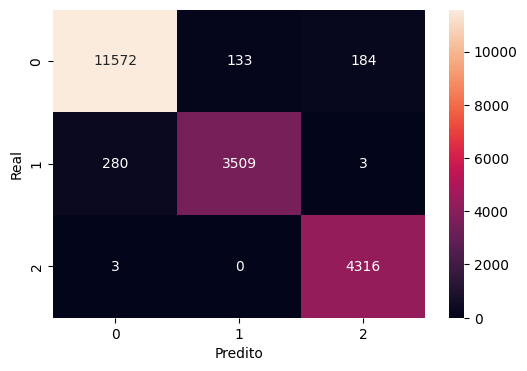

In [ ]:
# Avaliação no teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Acurácia no teste: {test_acc}")

# Previsões
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Relatório
print(classification_report(y_test, y_pred_classes))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Construção do Modelo com Regularização

Para melhorar a capacidade de generalização e prevenir overfitting, implementamos técnicas de regularização na arquitetura da rede neural:

- **Regularização L2 (Ridge)**: adicionada na primeira camada densa com um parâmetro de penalização 0.001. Essa técnica ajuda a manter os pesos da rede pequenos, evitando que o modelo dependa excessivamente de características específicas dos dados de treino.
  
- **Dropout**: aplicado após as duas primeiras camadas densas, com taxa de 30%. Durante o treinamento, 30% dos neurônios são desativados aleatoriamente a cada iteração, o que força a rede a não depender de neurônios individuais e melhora a robustez do modelo.

### Arquitetura da Rede

- Primeira camada: 64 neurônios com ReLU e regularização L2.
- Dropout (30%).
- Segunda camada: 32 neurônios com ReLU.
- Dropout (30%).
- Camada de saída: 3 neurônios com ativação softmax para classificação multiclasses.

Este modelo é mais robusto e menos propenso a memorizar dados específicos do conjunto de treino, favorecendo uma melhor generalização para dados novos.


In [ ]:
model_reg = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model_reg.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_reg = model_reg.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32
)


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7762 - loss: 0.6118 - val_accuracy: 0.9383 - val_loss: 0.2434
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9307 - loss: 0.2858 - val_accuracy: 0.9518 - val_loss: 0.2019
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9427 - loss: 0.2287 - val_accuracy: 0.9566 - val_loss: 0.1837
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9472 - loss: 0.2106 - val_accuracy: 0.9584 - val_loss: 0.1736
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9501 - loss: 0.2020 - val_accuracy: 0.9584 - val_loss: 0.1684
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9512 - loss: 0.1960 - val_accuracy: 0.9562 - val_loss: 0.1671
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9574 - loss: 0.1782 - val_accuracy: 0.9579 - val_loss: 0.1615
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9568 - loss: 0.1785

## Treinamento do Modelo com Regularização L2 e Dropout

O modelo com regularização L2 (lambda=0.001) e dropout (30%) foi treinado por 50 épocas, utilizando 20% dos dados de treino para validação.

### Análise dos resultados do treinamento

- A acurácia inicial no treino começou em aproximadamente 77%, subindo rapidamente para valores entre 95% e 96% ao longo das primeiras épocas.
- A acurácia de validação variou em torno de 95% a 96%, indicando boa generalização do modelo.
- A função de perda (loss) diminuiu consistentemente tanto no treino quanto na validação, com perda de validação levemente mais alta, como esperado devido à regularização.
- O modelo apresentou estabilidade, sem sinais claros de overfitting, o que indica que a combinação de dropout e regularização L2 está ajudando a controlar o ajuste excessivo aos dados de treino.


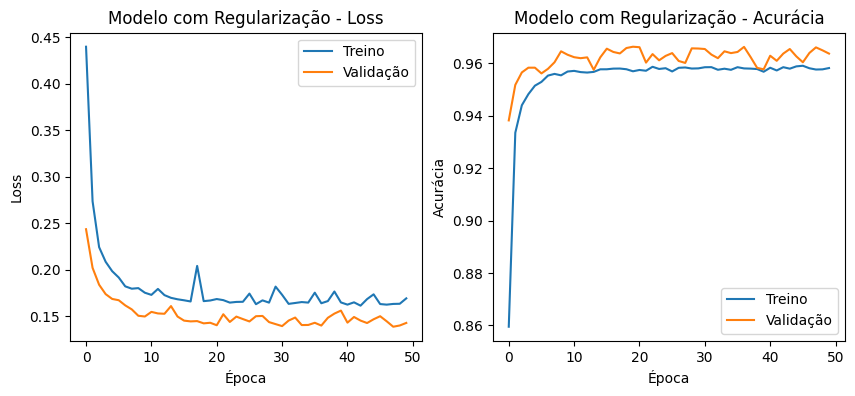

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title(f'{title} - Loss')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Treino')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title(f'{title} - Acurácia')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.show()

plot_history(history_reg, 'Modelo com Regularização')

## Visualização do Histórico de Treinamento com Regularização

Os gráficos abaixo ilustram a evolução da função de perda (loss) e da acurácia durante o treinamento do modelo com regularização L2 e dropout.

- O gráfico da **loss** mostra a diminuição da função de custo tanto para o conjunto de treino quanto para o de validação, indicando que o modelo está aprendendo e ajustando seus pesos.
- O gráfico da **acurácia** apresenta um aumento gradual tanto no treino quanto na validação, atingindo valores estáveis em torno de 96% a 97%.

A ausência de grandes divergências entre as curvas de treino e validação sugere que o modelo não está sofrendo de overfitting significativo, mostrando uma boa capacidade de generalização.

Essas visualizações são fundamentais para avaliar o comportamento do modelo durante o treinamento e para guiar possíveis ajustes nos hiperparâmetros.


# Avaliação Final do Modelo no Conjunto de Teste

In [ ]:
test_loss, test_acc = model_reg.evaluate(X_test, y_test)
print(f"Acurácia no teste: {test_acc:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9572 - loss: 0.1875
Acurácia no teste: 0.9556


Aqui, medimos o desempenho do modelo em dados que ele nunca viu, para ter uma ideia real da capacidade de generalização.

## Fazendo previsões usando o modelo treinado

In [ ]:
y_pred = model_reg.predict(X_test)

y_pred_classes = y_pred.argmax(axis=1)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


O modelo retorna probabilidades para cada classe. Usamos o índice da maior probabilidade para definir a classe prevista.



## Gerando relatório completo com métricas de classificação

In [ ]:

print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11889
           1       0.96      0.89      0.92      3792
           2       0.93      1.00      0.96      4319

    accuracy                           0.96     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000



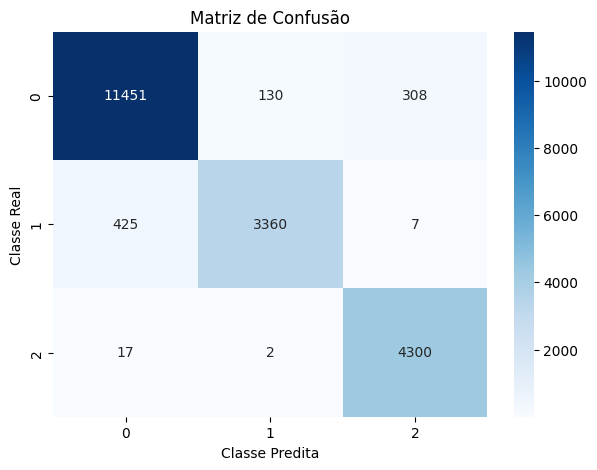

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

A matriz de confusão mostra, para cada classe real, quantas amostras foram corretamente classificadas e quantas foram confundidas com outras classes.